In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data = pd.read_csv('Molecular-data.csv')
data

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456
5,24.931968,5.559
6,26.612291,5.208
7,26.694301,5.192
8,26.434639,5.243
9,26.495280,5.231


In [ ]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

In [ ]:
train_dataset[:10]

,Molar volume,Density
28,26.407447,5.435
11,25.019625,5.638
10,25.370620,5.560
41,27.711805,5.357
2,26.510484,5.228
27,26.892351,5.337
38,29.811785,4.897
31,29.069755,5.022
22,26.305806,5.456
4,25.402642,5.456


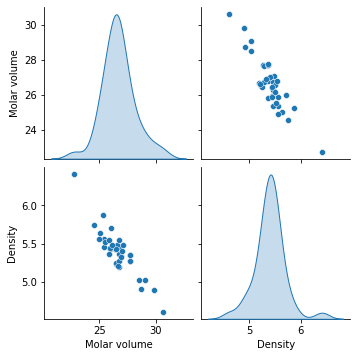

In [ ]:
sns.pairplot(train_dataset[['Molar volume', 'Density']], diag_kind='kde')

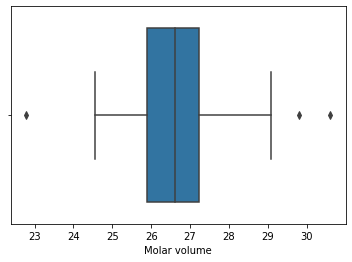

In [ ]:
sns.boxplot(x=train_dataset['Molar volume'])

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Molar volume,40.0,26.670893,1.430829,22.778641,25.89957,26.604407,27.238629,30.605477
Density,40.0,5.392525,0.288503,4.609000,5.27450,5.418500,5.497750,6.409000


In [ ]:
# Collect input feature for training, molar volume value in this case
train_features = train_dataset.copy() #dataframe type
test_features = test_dataset.copy()

# Collect respective label, density value in this case
train_labels = train_features.pop('Density') # series type
test_labels = test_features.pop('Density')

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[26.670893]


In [ ]:
molar_volume = np.array(train_features['Molar volume'])

molar_volume_normalizer = preprocessing.Normalization(input_shape=[1,])
molar_volume_normalizer.adapt(molar_volume)

In [ ]:
basic_model = keras.Sequential([
    molar_volume_normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

basic_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 612
Trainable params: 609
Non-trainable params: 3
_________________________________________________________________


In [ ]:
basic_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_error')

In [ ]:
input_train = train_features['Molar volume']

In [ ]:
%%time
history = basic_model.fit(
    input_train, train_labels,
    epochs=1000,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.4)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 5.5867 - val_loss: 5.5570
Epoch 2/1000
1/1 [==============================] - 0s 50ms/step - loss: 5.5739 - val_loss: 5.5464
Epoch 3/1000
1/1 [==============================] - 0s 48ms/step - loss: 5.5614 - val_loss: 5.5361
Epoch 4/1000
1/1 [==============================] - 0s 52ms/step - loss: 5.5491 - val_loss: 5.5262
Epoch 5/1000
1/1 [==============================] - 0s 52ms/step - loss: 5.5370 - val_loss: 5.5164
Epoch 6/1000
1/1 [==============================] - 0s 50ms/step - loss: 5.5250 - val_loss: 5.5067
Epoch 7/1000
1/1 [==============================] - 0s 50ms/step - loss: 5.5137 - val_loss: 5.4971
Epoch 8/1000
1/1 [==============================] - 0s 49ms/step - loss: 5.5031 - val_loss: 5.4881
Epoch 9/1000
1/1 [==============================] - 0s 52ms/step - loss: 5.4931 - val_loss: 5.4796
Epoch 10/1000
1/1 [==============================] - 0s 47ms/step - loss: 5.4832 - val_loss: 5.4711
Epoch 11/10

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

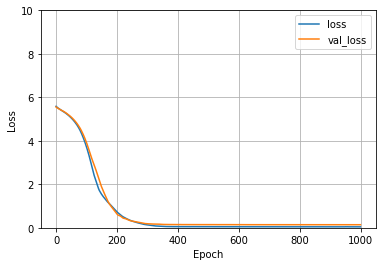

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_loss(history)

In [ ]:
test_results = basic_model.evaluate(
    test_features['Molar volume'],
    test_labels, verbose=1)

1/1 [==============================] - 0s 15ms/step - loss: 0.1143


In [ ]:
def plot_density(x, y):
  plt.scatter(train_features['Molar volume'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Molar volume')
  plt.ylabel('Density')
  plt.legend()

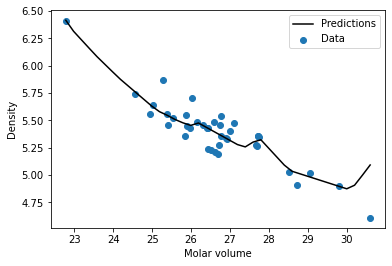

In [ ]:
x = tf.linspace(train_features['Molar volume'].min(), train_features['Molar volume'].max(), 40)
pred = basic_model.predict(x)
plot_density(x,pred)

In [ ]:

train_features['Molar volume'].max()

30.6054772

In [ ]:
basic_model.predict(np.array([29.6054772]))

array([[4.9206195]], dtype=float32)

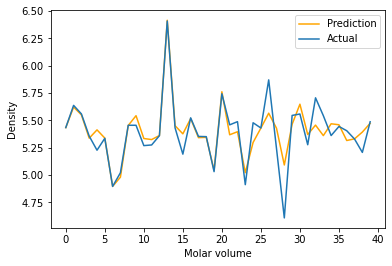

In [ ]:
pred_y = basic_model.predict(train_features)
actual_trend=train_labels.values
plt.plot(pred_y, color='orange', label='Prediction')
plt.plot(actual_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

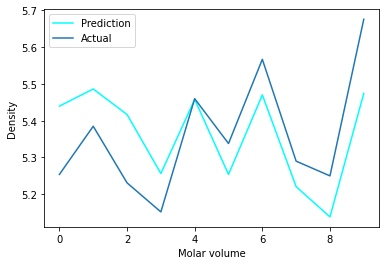

In [ ]:
pred_test = basic_model.predict(test_features)
actual_test_trend=test_labels.values
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()

In [ ]:
differences = (1 - sum(abs(pred_test - actual_test_trend.reshape(-1,1)))/len(actual_test_trend)) * 100
pred_accuracy = differences.item()
pred_accuracy

88.57150569915771